In [2]:
import sys
import os

sys.path.insert(0,'../..')
sys.path.insert(0,'../../py')
import parameters
import utilities
import spectrogram_utilities
import output_utilities
import spectrogram_output_visualiser

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from sklearn import preprocessing

In [3]:
# matplotlib.get_backend()
%matplotlib inline

awd_event = 1
site = parameters.sites[0]

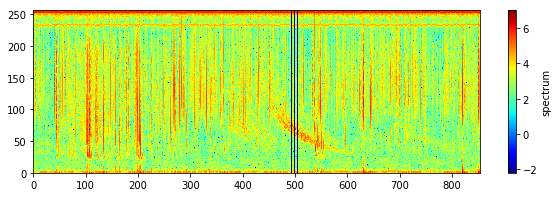

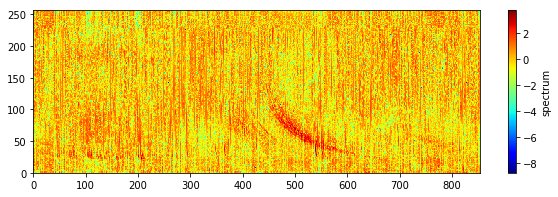

(257, 853)
['430' '494' '500' '505']
[[ 19 128 368 575]
 [ 19 128 432 639]
 [ 19 128 438 645]
 [ 19 128 443 650]]
[[128 237   0 208]
 [128 237 208 416]
 [128 237 416 624]
 [128 237 624 832]
 [128 237   0 208]
 [128 237  41 249]
 [128 237  82 290]
 [128 237 123 331]]


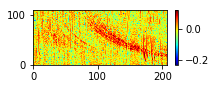

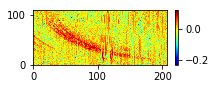

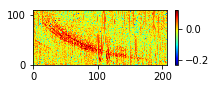

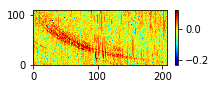

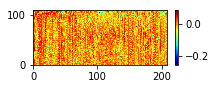

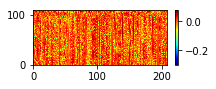

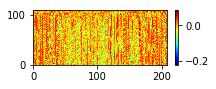

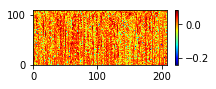

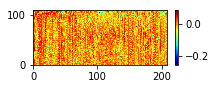

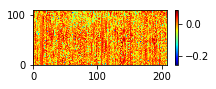

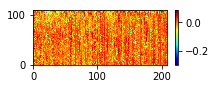

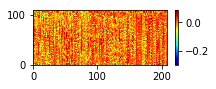

In [4]:
file = utilities.random_file(awd_event, site)
# file = '2013-06-09UT17:21:33.01047109.marion.vr2'

indices, time, freq , spectrogram = spectrogram_output_visualiser.spectrogram_and_output(awd_event,site, file,zscore=False,output=True)
spectrogram_utilities.spectrogram_plot(spectrogram, size=(10,3))

indices, time, freq , spectrogram = spectrogram_output_visualiser.spectrogram_and_output(awd_event,site, file,zscore=True,output=False)
spectrogram_utilities.spectrogram_plot(spectrogram, size=(10,3))


indices, spectrogram, specs_cuts, noise_cuts = spectrogram_output_visualiser.spectrogram_cut(awd_event, site, file, 10, zscore=True, output=False)

print(spectrogram.shape)
indices = np.asarray(indices)
print(indices[:,0])
print(specs_cuts)
print(noise_cuts)

for whistler in specs_cuts:
    fig = plt.figure(figsize=(3,1))
    img = plt.pcolormesh(spectrogram[whistler[0]:whistler[1],whistler[2]:whistler[3]], cmap='jet')#, vmin=0, vmax=0.1)
    fig.colorbar(mappable=img)
    plt.show()

for noise in noise_cuts:
    fig = plt.figure(figsize=(3,1))
    img = plt.pcolormesh(spectrogram[noise[0]:noise[1],noise[2]:noise[3]], cmap='jet')
    fig.colorbar(mappable=img)
    plt.show()
